## Лабораторная работа №4

### Работа с классификацией данных при помощи scikit-learn. Построение модели машинного обучения методом k-средних.

### Задания:

#### 1-2. **Загрузка и изучение данных**

In [255]:
from sklearn.datasets import load_digits, load_wine, load_breast_cancer

digits_dataset = load_digits()
wine_dataset = load_wine()
breast_cancer_dataset = load_breast_cancer()

def display_dataset_info(name, dataset):
    print(f"\n=== {name} Dataset ===")
    print("Keys:", dataset.keys())
    
    print("\nDescription:\n", dataset["DESCR"][:1000] + "\n...")
    
    print("Target names:", dataset['target_names'])
    print("Feature names:", dataset['feature_names'])

    print("\nData Type:", type(dataset['data']))
    print("Data Shape:", dataset['data'].shape)
    print("First 150 rows of data:\n", dataset['data'][:150])
    
    print("\nTarget Type:", type(dataset['target']))
    print("Target Shape:", dataset['target'].shape)
    print("Target Values:\n", dataset['target'][:150])

display_dataset_info("Digits", digits_dataset)
display_dataset_info("Wine", wine_dataset)
display_dataset_info("Breast Cancer", breast_cancer_dataset)



=== Digits Dataset ===
Keys: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Description:
 .. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set.

#### 3. **Разделение данных на обучающие и тестовые наборы**

In [256]:
from sklearn.datasets import load_digits, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split

digits_dataset = load_digits()
wine_dataset = load_wine()
breast_cancer_dataset = load_breast_cancer()

def split_and_display_shapes(name, data, target):
    X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)
    print(f"\n=== {name} Dataset Train-Test Split ===")
    print("Shape of X_train:", X_train.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_test:", y_test.shape)

split_and_display_shapes("Digits", digits_dataset['data'], digits_dataset['target'])
split_and_display_shapes("Wine", wine_dataset['data'], wine_dataset['target'])
split_and_display_shapes("Breast Cancer", breast_cancer_dataset['data'], breast_cancer_dataset['target'])



=== Digits Dataset Train-Test Split ===
Shape of X_train: (1347, 64)
Shape of y_train: (1347,)
Shape of X_test: (450, 64)
Shape of y_test: (450,)

=== Wine Dataset Train-Test Split ===
Shape of X_train: (133, 13)
Shape of y_train: (133,)
Shape of X_test: (45, 13)
Shape of y_test: (45,)

=== Breast Cancer Dataset Train-Test Split ===
Shape of X_train: (426, 30)
Shape of y_train: (426,)
Shape of X_test: (143, 30)
Shape of y_test: (143,)


#### 4. **Исследование данных с помощью визуализации**

c:\Users\Les\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])
c:\Users\Les\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Users\Les\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\Les\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:115: RuntimeWarning: invalid value encountered in divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])
posx

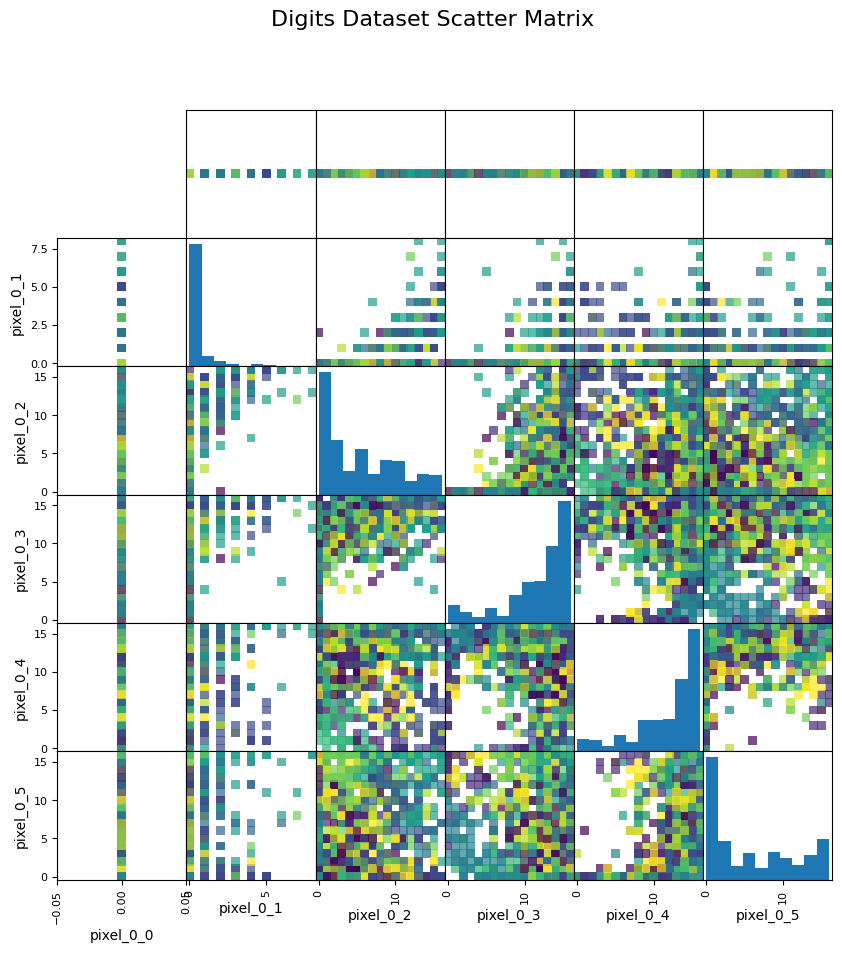

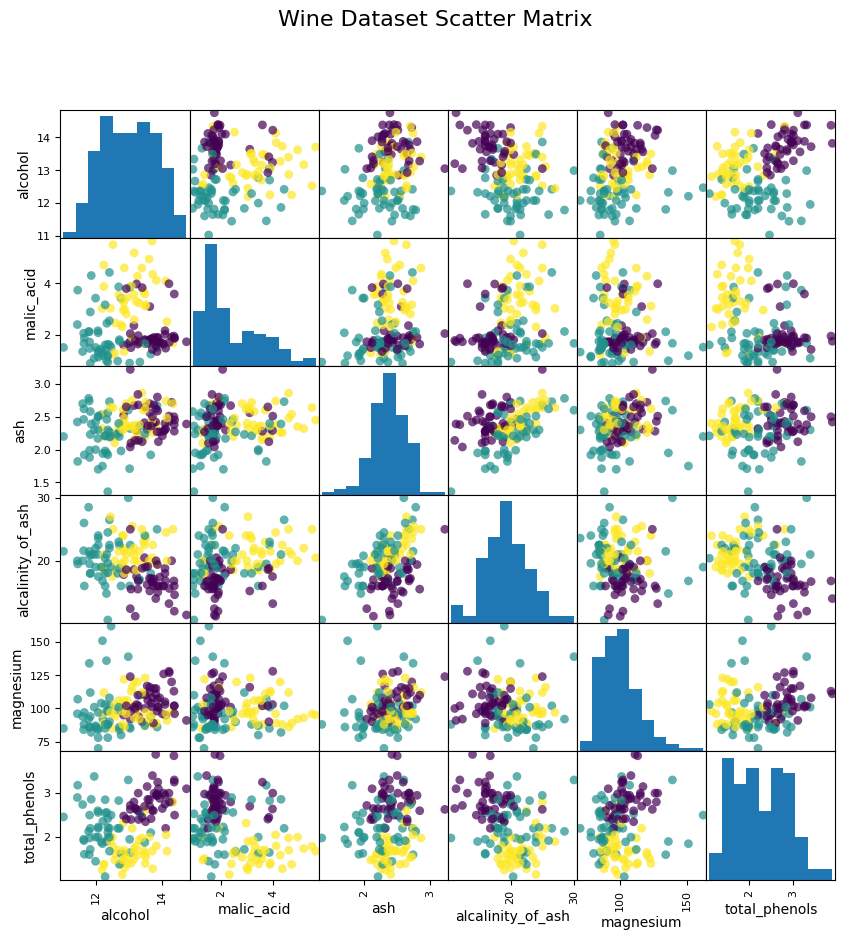

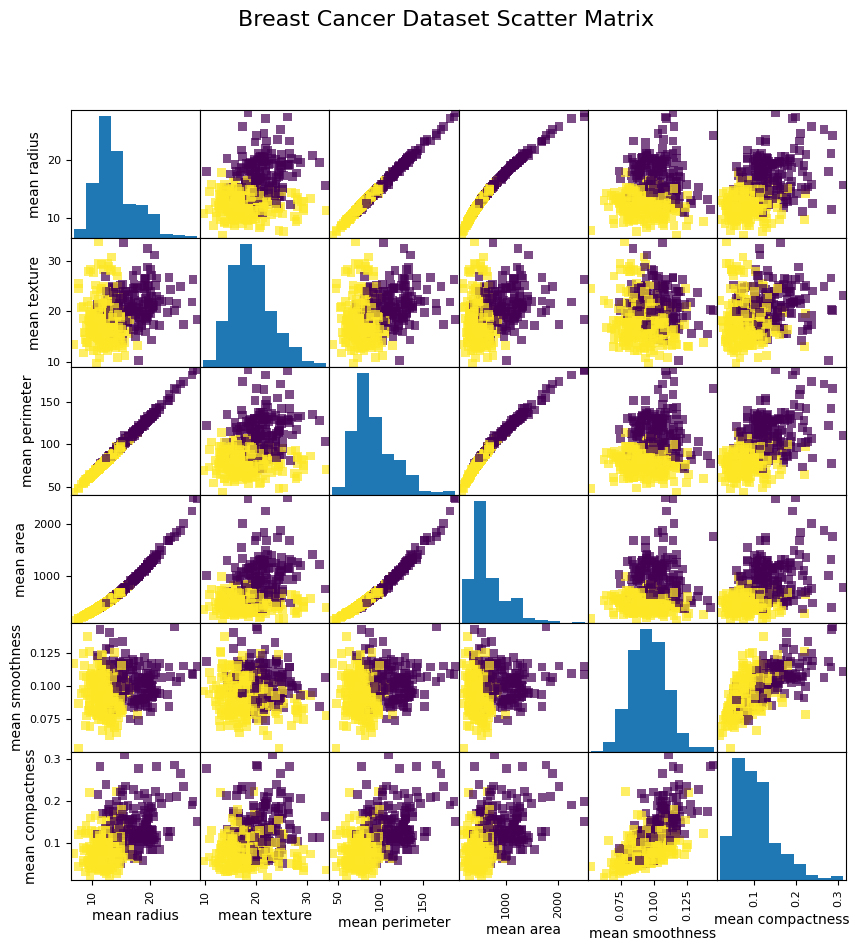

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split

digits_dataset = load_digits()
wine_dataset = load_wine()
breast_cancer_dataset = load_breast_cancer()

def plot_scatter_matrix(name, dataset, sample_features=6):
    X_train, _, y_train, _ = train_test_split(dataset['data'], dataset['target'], random_state=0)
    feature_subset = dataset.feature_names[:sample_features]
    dataframe = pd.DataFrame(X_train, columns=dataset.feature_names)[feature_subset]
    
    marker = 'o' if name == "Wine" else 's'
    alpha = 0.7
    figsize = (10, 10)
    
    pd.plotting.scatter_matrix(dataframe, c=y_train, figsize=figsize, marker=marker, s=40, alpha=alpha)
    plt.suptitle(f"{name} Dataset Scatter Matrix", fontsize=16)
    plt.show()

plot_scatter_matrix("Digits", digits_dataset)
plot_scatter_matrix("Wine", wine_dataset)
plot_scatter_matrix("Breast Cancer", breast_cancer_dataset)


#### 5. **Построение модели по методу k-ближайших средних**

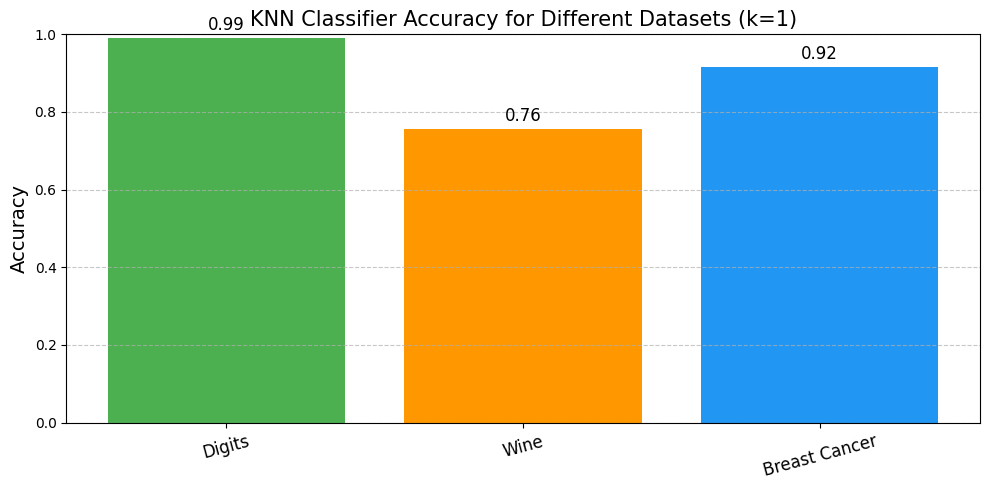

In [258]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

datasets = {
    "Digits": load_digits(),
    "Wine": load_wine(),
    "Breast Cancer": load_breast_cancer()
}

n_neighbors = 1

def get_knn_accuracy(dataset):
    X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], random_state=0)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    return accuracy_score(y_test, knn.predict(X_test))

accuracies = {name: get_knn_accuracy(dataset) for name, dataset in datasets.items()}

plt.figure(figsize=(10, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['#4CAF50', '#FF9800', '#2196F3'])
plt.ylim(0, 1)
plt.ylabel('Accuracy', fontsize=14)
plt.title(f'KNN Classifier Accuracy for Different Datasets (k={n_neighbors})', fontsize=15)
plt.xticks(rotation=15, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


#### 6. **Получение прогнозов модели**

In [259]:
import numpy as np
from sklearn.datasets import load_digits, load_wine, load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

digits_dataset = load_digits()
wine_dataset = load_wine()
breast_cancer_dataset = load_breast_cancer()

def make_prediction(name, dataset, new_data):
    X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], random_state=0)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(new_data)
    
    print(f"\n=== {name} Dataset ===")
    print("Shape of array new_data: {}".format(new_data.shape))
    print("Prediction: {}".format(prediction))
    
    if name == "Digits":
        print("Predicted label (digit): {}".format(prediction[0]))
    elif name == "Wine":
        print("Predicted class: {}".format(dataset['target_names'][prediction][0]))
    elif name == "Breast Cancer":
        print("Predicted class: {}".format(dataset['target_names'][prediction][0]))

new_data_digits = np.array([[0, 0, 5, 12, 0, 0, 0, 0, 
                             0, 0, 0, 0, 0, 0, 0, 0, 
                             0, 0, 0, 0, 0, 0, 0, 0, 
                             0, 0, 0, 0, 0, 0, 0, 0, 
                             0, 0, 0, 0, 0, 0, 0, 0, 
                             0, 0, 0, 0, 0, 0, 0, 0, 
                             0, 0, 0, 0, 0, 0, 0, 0, 
                             0, 0, 0, 0, 0, 0, 0, 0]])  

new_data_wine = np.array([[13.0, 2.5, 2.5, 19.0, 100.0, 1.5, 2.5, 0.5, 1.5, 0.3, 1.2, 0.8, 3.0]])

new_data_breast_cancer = np.array([[15.5, 20.0, 85.0, 545.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0,
                                     0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                                     0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])  

make_prediction("Digits", digits_dataset, new_data_digits)
make_prediction("Wine", wine_dataset, new_data_wine)
make_prediction("Breast Cancer", breast_cancer_dataset, new_data_breast_cancer)



=== Digits Dataset ===
Shape of array new_data: (1, 64)
Prediction: [1]
Predicted label (digit): 1

=== Wine Dataset ===
Shape of array new_data: (1, 13)
Prediction: [1]
Predicted class: class_1

=== Breast Cancer Dataset ===
Shape of array new_data: (1, 30)
Prediction: [1]
Predicted class: benign


#### 7. **Оценка качества модели**

In [260]:
import numpy as np
from sklearn.datasets import load_digits, load_wine, load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load datasets
datasets = {
    "Digits": load_digits(),
    "Wine": load_wine(),
    "Breast Cancer": load_breast_cancer()
}

def evaluate_model(name, data):
    X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], random_state=0)
    
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    accuracy_mean = np.mean(y_pred == y_test)
    accuracy_score = knn.score(X_test, y_test)
    
    # Display the data and evaluation details
    print(f"\n=== {name} Dataset Evaluation ===")
    print(f"Features: {X_train.shape[1]} | Classes: {len(np.unique(data['target']))} | Samples: {X_train.shape[0] + X_test.shape[0]}")
    print(f"Test Samples: {len(y_test)}")
    print(f"Accuracy (using np.mean): {accuracy_mean:.2f}")
    print(f"Accuracy (using knn.score): {accuracy_score:.2f}")
    
    # Show the first 10 predictions alongside actual labels for verification
    print("\nFirst 10 predictions vs actual labels:")
    for i in range(10):
        actual_label = data['target_names'][y_test[i]] if 'target_names' in data else y_test[i]
        predicted_label = data['target_names'][y_pred[i]] if 'target_names' in data else y_pred[i]
        print(f"Prediction: {predicted_label} | Actual: {actual_label}")

# Evaluate each dataset using a loop
for name, dataset in datasets.items():
    evaluate_model(name, dataset)



=== Digits Dataset Evaluation ===
Features: 64 | Classes: 10 | Samples: 1797
Test Samples: 450
Accuracy (using np.mean): 0.99
Accuracy (using knn.score): 0.99

First 10 predictions vs actual labels:
Prediction: 2 | Actual: 2
Prediction: 8 | Actual: 8
Prediction: 2 | Actual: 2
Prediction: 6 | Actual: 6
Prediction: 6 | Actual: 6
Prediction: 7 | Actual: 7
Prediction: 1 | Actual: 1
Prediction: 9 | Actual: 9
Prediction: 8 | Actual: 8
Prediction: 5 | Actual: 5

=== Wine Dataset Evaluation ===
Features: 13 | Classes: 3 | Samples: 178
Test Samples: 45
Accuracy (using np.mean): 0.76
Accuracy (using knn.score): 0.76

First 10 predictions vs actual labels:
Prediction: class_0 | Actual: class_0
Prediction: class_1 | Actual: class_2
Prediction: class_1 | Actual: class_1
Prediction: class_0 | Actual: class_0
Prediction: class_1 | Actual: class_1
Prediction: class_1 | Actual: class_1
Prediction: class_0 | Actual: class_0
Prediction: class_2 | Actual: class_2
Prediction: class_1 | Actual: class_1
Pre

#### 8. **Выводы по качеству моделей**

1. **Digits Dataset:**

-Точность: 0.99

Модель KNN показала очень высокую точность в распознавании рукописных цифр, что подтверждает её эффективность на данном наборе данных. Первые 10 предсказаний совпали с фактическими метками, что свидетельствует о её надежности.

2. **Wine Dataset:**

-Точность: 0.76

Точность модели на этом наборе данных была ниже по сравнению с набором цифр. Это может быть связано с более сложной структурой классов и особенностями данных, так как KNN может не всегда хорошо работать с небольшими размерами выборок и большими различиями между классами. Несоответствия между предсказанными и реальными метками также наблюдаются.

3. **Breast Cancer Dataset:**

-Точность: 0.92

Модель показала хорошую точность, что указывает на её способность эффективно различать доброкачественные и злокачественные опухоли. Однако есть случаи, когда предсказанные метки не совпадают с реальными, что требует дополнительного анализа.